In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
dataset = pd.read_csv('D:/Data Science/Dataset/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [151]:
data = dataset.drop(['Id'], axis =1)

In [152]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
data.shape

(150, 5)

In [154]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

3 classes i.e. k=3

In [155]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [156]:
features = [feature for feature in data.columns]
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

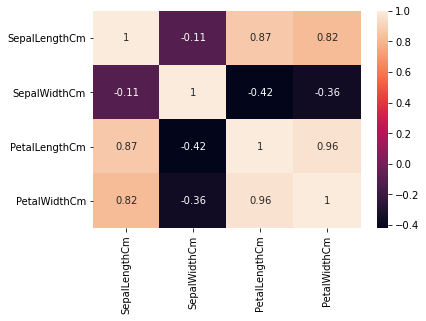

In [157]:
corr_mat = data.corr()
sns.heatmap(corr_mat, annot = True)

Dropping highly correlated features: PetalLengthCm and PetalWidthCm

In [158]:
X = data.drop(['Species', 'PetalLengthCm', 'PetalWidthCm'], axis =1)
y = data['Species']

In [159]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)

model.fit(X)

KMeans(n_clusters=3)

In [160]:
data['pred'] = model.predict(X)

In [161]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [162]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,pred
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [163]:
data['pred'].value_counts()

1    53
2    50
0    47
Name: pred, dtype: int64

Text(0.5, 1.0, 'Predicted Clusters')

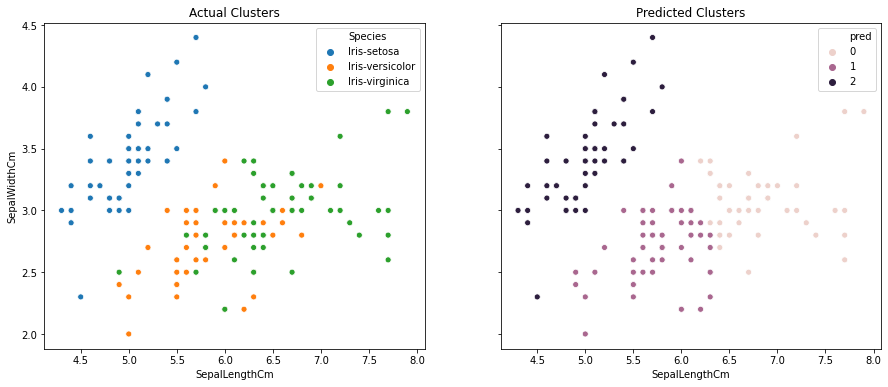

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
sns.scatterplot(ax=ax[0],data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
ax[0].set_title("Actual Clusters")
sns.scatterplot(ax=ax[1],data=data, x="SepalLengthCm", y="SepalWidthCm", hue="pred")
ax[1].set_title('Predicted Clusters')